# Метод опорных векторов

## Определение

Метод опорных векторов (машина опорных векторов) или SVM (от англ. Support Vector Machines) — это линейный алгоритм, используемый в задачах классификации и регрессии. Данный алгоритм имеет широкое применение на практике и может решать как линейные так и нелинейные задачи. Суть работы метода опорных векторов заключается в следующем: алгоритм создает гиперплоскость, которая оптимально разделяет данные на классы.


Другими словами, основной задачей алгоритма является найти наиболее правильную гиперплоскость, разделяющую данные на два класса, то есть SVM - это алгоритм, который получает на входе данные и возвращает разделяющую гиперплоскость.

## Разделяющая гиперплоскость

В пространстве $R^n$ уравнение $w_1x_1$ + $w_2x_2$ + ... + $w_nx_n$−$b$=$0$ при заданных $w$ = ($w_1$, $w_2$, ..., $w_n$) и $b$ определяет гиперплоскость — множество векторов $x$ =($x_1$,…,$x_n$), принадлежащих пространству меньшей размерности $(n−1)$. Например, для $R^1$ гиперплоскостью является точка, для $R^2$ — прямая, для $R^3$ — плоскость и т.д. Вектор w определяет вектор нормали к гиперплоскости, а через $b/||w||$ выражается расстояние от гиперплоскости до начала координат.

Гиперплоскость делит $R^n$ на два полупространства: $w_1x_1$ + $w_2x_2$ + ... + $w_nx_n$−$b$>0 и $w_1x_1$ + $w_2x_2$ + ... + $w_nx_n$−$b$<0.

## Метод опорных векторов в задаче классификации
Рассмотрим задачу бинарной классификации. Сначала алгоритм тренируется на объектах из обучающей выборки, для которых заранее известны метки классов. Далее уже обученный алгоритм предсказывает метку класса для каждого объекта из отложенной/тестовой выборки. Метки классов могут принимать значения $Y = \{-1, +1\}$. Объект — вектор c N признаками $x = (x_1, x_2, …, x_n)$ в пространстве $R^n$. При обучении алгоритм должен построить функцию $F(x)=y$, которая принимает в себя аргумент $x$ — объект из пространства $R^n$ и выдает метку класса $y$.

Разделяющую гиперплоскость можно построить разными способами, но в SVM веса $w$ и $b$ настраиваются таким образом, чтобы объекты классов лежали как можно дальше от разделяющей гиперплоскости. Другими словами, алгоритм максимизирует зазор (англ. margin) между гиперплоскостью и объектами классов, которые расположены ближе всего к ней.

## Как SVM находит лучшую линию

Алгоритм SVM устроен таким образом, что он ищет точки на графике, которые расположены непосредственно к линии разделения ближе всего. Эти точки называются опорными векторами. Отсюда и название алгоритма. Затем, алгоритм вычисляет расстояние между опорными векторами и разделяющей плоскостью. Это расстояние называется зазором (margin). Основная цель алгоритма — максимизировать расстояние зазора. Лучшей гиперплоскостью считается такая гиперплоскость, для которой этот зазор является максимально большим.

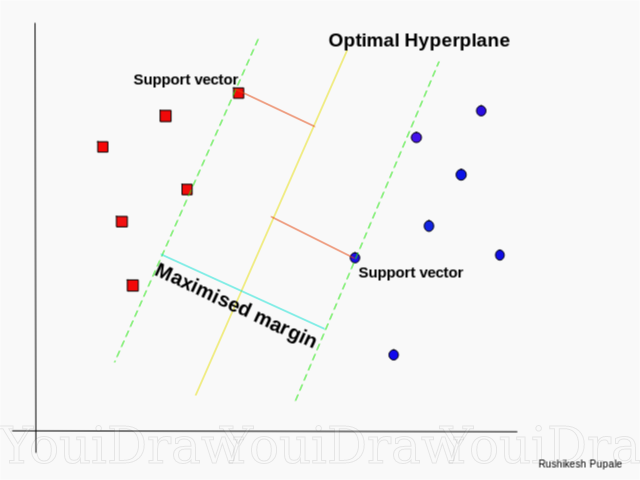

## Математика
Чтобы разделяющая гиперплоскость как можно дальше отстояла от точек выборки, ширина полосы должна быть максимальной. Вектор $w$ — вектор нормали к разделяющей гиперплоскости. Здесь и далее будем обозначать скалярное произведение двух векторов как $\langle a,b\rangle$ или $a^Tb$. Давайте найдем проекцию вектора, концами которого являются опорные вектора разных классов, на вектор $w$. Эта проекция и будет показывать ширину разделяющий полосы.

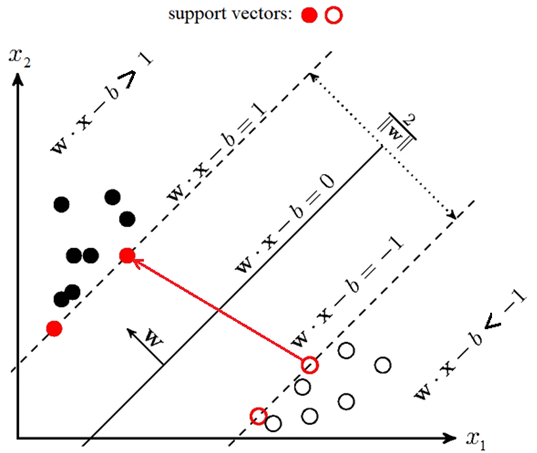

image.png

image.png

image.png

image.png

Отступом (англ. margin) объекта x от границы классов называется величина $M=y(w^Tx-b)$. Алгоритм допускает ошибку на объекте тогда и только тогда, когда отступ $M$ отрицателен (когда $y$ и $(w^Tx-b)$ разных знаков). Если $M ∈ (0, 1)$, то объект попадает внутрь разделяющей полосы. Если $M > 1$, то объект x классифицируется правильно, и находится на некотором удалении от разделяющей полосы. Т.е. алгоритм будет правильно классифицировать объекты, если выполняется условие:

$y(w^Tx-b) \geqslant 1$

Если объединить два выведенных выражения, то получим дефолтную настройку SVM с жестким зазором (hard-margin SVM), когда никакому объекту не разрешается попадать на полосу разделения.


$ \left\{ \begin{array}{ll} (w^Tw)/2 \rightarrow min & \textrm{}\\ y(w^Tx-b) \geqslant 1 & \textrm{} \end{array} \right. $

Всё это хорошо до тех пор, пока у нас классы линейно разделимы. Чтобы алгоритм смог работать и с линейно неразделимыми данными, давайте немного преобразуем нашу систему. Позволим алгоритму допускать ошибки на обучающих объектах, но при этом постараемся, чтобы ошибок было поменьше. Введём набор дополнительных переменных $\xi _i > 0$, характеризующих величину ошибки на каждом объекте $x_i$. Введём в минимизируемый функционал штраф за суммарную ошибку:


$ \left\{ \begin{array}{ll} (w^Tw)/2 + \alpha\sum\xi _i \rightarrow min & \textrm{}\\ y(w^Tx_i-b) \geqslant 1 -\xi _i & \textrm{}\\ \xi _i\geqslant0& \textrm{} \end{array} \right. $


Будем считать количество ошибок алгоритма (когда M<0). Назовем это штрафом (Penalty). Тогда штраф для всех объектов будет равен сумме штрафов для каждого объекта $x_i$, где $[M_i<0]$ — пороговая функция:


$Penalty = \sum[M_i < 0]$


$ [M_i < 0] = \left\{ \begin{array}{ll} 1 & \textrm{, если }M_i < 0\\ 0 & \textrm{, если }M_i\geqslant 0 \end{array} \right. $


Далее сделаем штраф чувствительным к величине ошибки (чем сильнее $M$ "уходит в минус" — тем больше штраф) и заодно введем штраф за приближение объекта к границе классов. Для этого возьмем функцию, которая ограничивает пороговую функцию ошибки:


$Penalty = \sum[M_i < 0] \leqslant \sum(1- M_i)_+ = \sum max(0,1-M_i)$


При добавлении к выражению штрафа слагаемого $\alpha(w^Tw)/2$ получаем классическую фукцию потерь SVM с мягким зазором (soft-margin SVM) для одного объекта:


$Q =max(0,1- M_i) + \alpha(w^Tw)/2$


$Q =max(0,1- yw^Tx) + \alpha(w^Tw)/2$

## Нелинейное обобщение, kernel trick
Существует ещё один подход к решению проблемы линейной разделимости, известный как трюк с ядром (kernel trick). Если выборка объектов с признаковым описанием из $X=R^n$ не является линейно разделимой, мы можем предположить, что существует некоторое пространство $H$, вероятно, большей размерности, при переходе в которое выборка станет линейно разделимой. Пространство $H$ здесь называют спрямляющим, а функцию перехода $ψ:X→H$ — спрямляющим отображением. Построение SVM в таком случае происходит так же, как и раньше, но в качестве векторов признаковых описаний используются векторы $ψ(x)$, а не $x$ . Соответственно, скалярное произведение $⟨x_1,x_2⟩$ в пространстве $X$ везде заменяется скалярным произведением $⟨ψ(x_1),ψ(x_2)⟩$ в пространстве $H$. Отсюда следует, что пространство $H$ должно быть гильбертовым, так как в нём должно быть определено скалярное произведение.

Обратим внимание на то, что постановка задачи и алгоритм классификации не используют в явном виде признаковое описание и оперируют только скалярными произведениями признаков объектов. Это даёт возможность заменить скалярное произведение в пространстве $X$ на ядро — функцию, являющуюся скалярным произведением в некотором $H$. При этом можно вообще не строить спрямляющее пространство в явном виде, и вместо подбора $ψ$ подбирать непосредственно ядро.

## Плюсы и минусы классического SVM:


Плюсы:
*   хорошо работает с пространством признаков большого размера;
*   хорошо работает с данными небольшого объема;
*   алгоритм максимизирует разделяющую полосу, которая, как подушка безопасности, позволяет уменьшить количество ошибок классификации;
*   так как алгоритм сводится к решению задачи квадратичного программирования в выпуклой области, то такая задача всегда имеет единственное решение (разделяющая гиперплоскость с определенными гиперпараметрами алгоритма всегда одна).

Минусы:
*   долгое время обучения (для больших наборов данных);
*   неустойчивость к шуму: выбросы в обучающих данных становятся опорными объектами-нарушителями и напрямую влияют на построение разделяющей гиперплоскости;
*   не описаны общие методы построения ядер и спрямляющих пространств, наиболее подходящих для конкретной задачи в случае линейной неразделимости классов.

## Примеры
Рассмотрим следующий пример. Допустим у нас есть набор данных, и мы хотим классифицировать и разделить красные квадраты и синие круги (допустим позитивное и отрицательное). Основной целью в данной задаче будет найти “идеальную” линию которая разделит эти два класса.

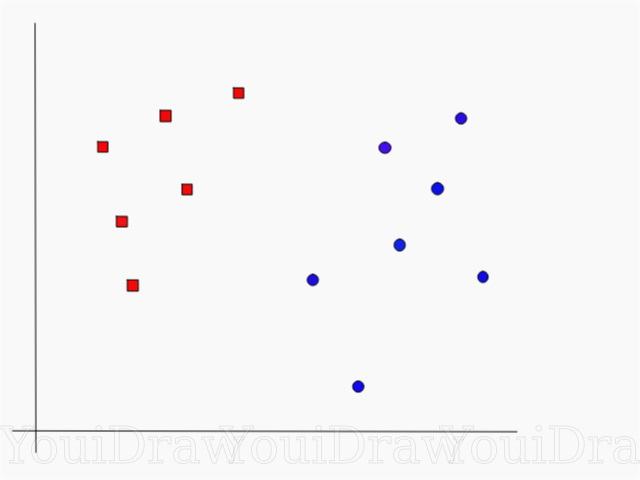

Одной, уникальной, линии, которая бы решала такую задачу, нет. Мы можем подобрать бесконечное множество таких линий, которые могут разделить эти два класса. Какая же именно “идеальна”?


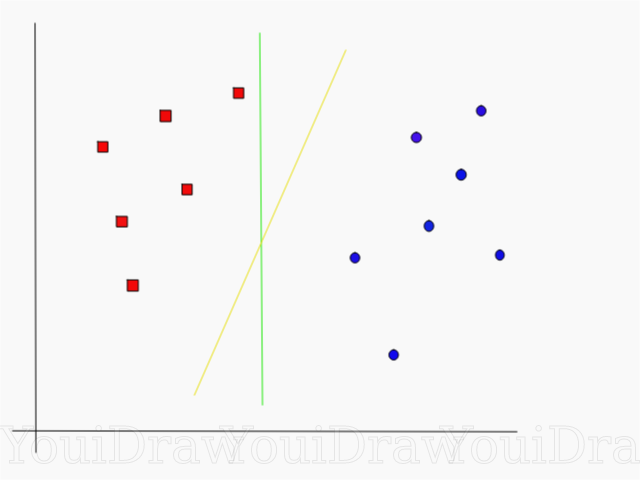

Желтая прямая - это та самая линия, которую бы выбрал алгоритм.

В случае с зеленой линией — она расположена слишком близко к красному классу. Несмотря на то, что она верно классифицировала все объекты текущего набора данных, такая линия не будет генерализованной — не будет так же хорошо вести себя с незнакомым набором данных. Задача нахождения генерализованной разделяющей двух классов является одной из основных задач в машинном обучении.

Рассмотрим следующий пример, с более сложным датасетом, который нельзя разделить линейно.

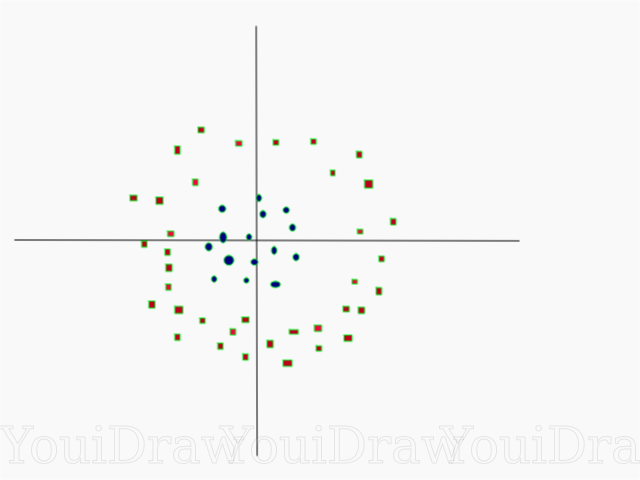

Очевидно, что этот набор данных нельзя разделить линейно. Мы не можем начертить прямую линию, которая бы классифицировала эти данные. Но, этот датасет можно разделить линейно, добавив дополнительное измерение, которое мы назовем осью Z. Представим, что координаты на оси Z регулируются следующим ограничением:
$z = x²+y²$


Таким образом, ордината Z представлена из квадрата расстояния точки до начала оси.
Ниже приведена визуализация того же набора данных, на оси Z.

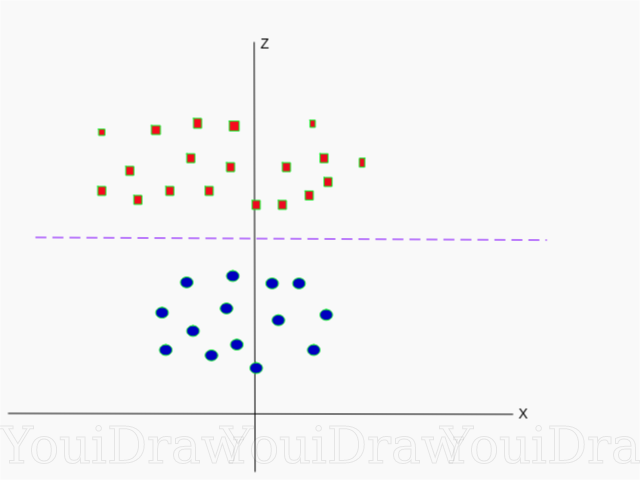

Теперь данные можно разделить линейно. Допустим пурпурная линия разделяющая данные z=k, где k константа. Если
$z = x²+y²$

, то следовательно и
$k = x²+y²$

— формула окружности. Таким образом, мы можем спроэцировать наш линейный разделитель, обратно к исходному количеству измерений выборки, используя эту трансформацию.

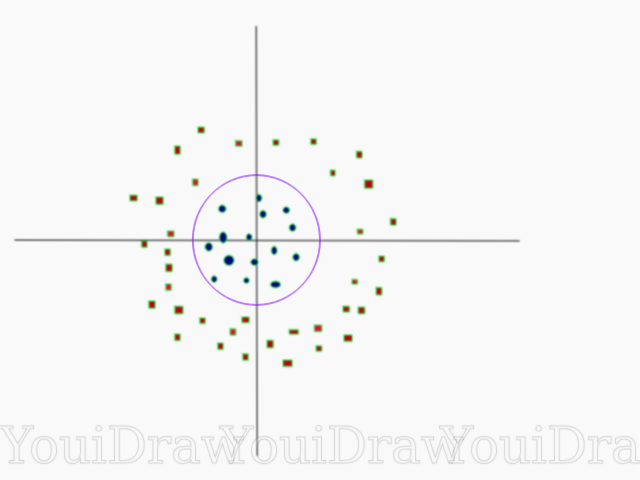

В результате, мы можем классифицировать нелинейный набор данных добавив к нему дополнительное измерение, а затем, привести обратно к исходному виду используя математическую трансформацию. Однако, не со всеми наборами данных можно с такой же легкостью провернуть такую трансформацию. К счастью, имплементация этого алгоритма в библиотеке sklearn решает эту задачу за нас.

## Наиболее важные настраиваемые параметры SVM

Параметры — это аргументы которые вы передаете при создании классификатора. Самые важные настраиваемые параметры SVM: "C" и "Гамма"

### "C"

Данный параметр помогает отрегулировать ту тонкую грань между “гладкостью” и точностью классификации объектов обучающей выборки. Чем больше значение “С” тем больше объектов обучающей выборки будут правильно классифицированы.


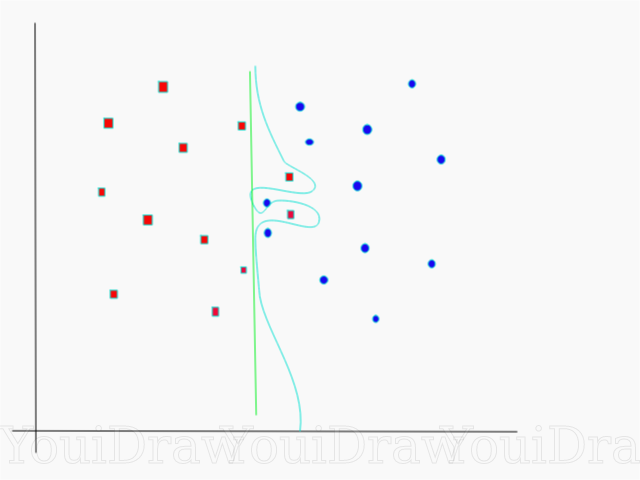

В данном примере есть несколько порогов принятия решений, которые мы можем определить для этой конкретной выборки. Обратите внимание на прямую (представлена на графике в виде зеленой линии) порога решений. С помощью этой прямой несколько объектов были классифицированы неверно. Эти точки, которые были классифицированы неправильно называются выбросами в данных.

Мы также можем настроить параметры таким образом, что в конечном итоге получим более изогнутую линию (светло-голубой порог решений), которая будет классифицировать асболютно все данные обучающей выборки правильно. Конечно, в таком случае, шансы того, что наша модель сможет генерализовать и показать столь же хорошие результаты на новых данных, катастрофически мала. Следовательно, если вы пытаетесь достигнуть точности при обучении модели, вам стоит нацелиться на что-то более ровное, прямое. Чем выше число “С” тем более запутанная гиперплоскость будет в вашей модели, но и выше число верно-классифицированных объектов обучающей выборки. Поэтому, важно “подкручивать” параметры модели под конкретный набор данных, чтобы избежать переобучения но, в то же время достигнуть высокой точности.


### Гамма

В официальной документации библиотеки SciKit Learn говорится, что гамма определяет насколько далеко каждый из элементов в наборе данных имеет влияние при определении “идеальной линии”. Чем ниже гамма, тем больше элементов, даже тех, которые достаточно далеки от разделяющей линии, принимают участие в процессе выбора этой самой линии. Если же, гамма высокая, тогда алгоритм будет “опираться” только на тех элементах, которые наиболее близки к самой линии.
Если задать уровень гаммы слишком высоким, тогда в процессе принятия решения о расположении линии будут учавствовать только самые близкие к линии элементы. Это поможет игнорировать выбросы в данных. Алгоритм SVM устроен таким образом, что точки расположенные наиболее близко относительно друг друга имеют больший вес при принятии решения. Однако при правильной настройке «C» и «gamma» можно добиться оптимального результата, который построит более линейную гиперплоскость игнорирующую выбросы, и следовательно, более генерализуемую.

## Примеры на python (scikit-learn)

### Пример 1

In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

Точки представлены в виде массива X, а классы к которому они принадлежат в виде массива y.
Теперь мы обучим нашу модель этой выборкой. Для данного примера задаем линейный параметр “ядра” классификатора (kernel)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf = clf.fit(X, y)

Предсказание класса нового объекта

In [ ]:
prediction = clf.predict([[0,6]])
prediction

array([2])

### Пример 2

Automatically created module for IPython interactive environment


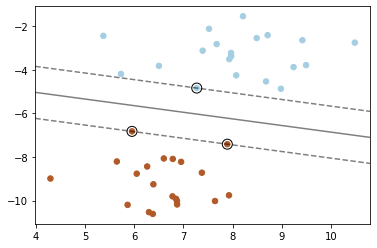

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### Пример 3

Сгенерируем случайный набор данных и разделим его на два разных класса:

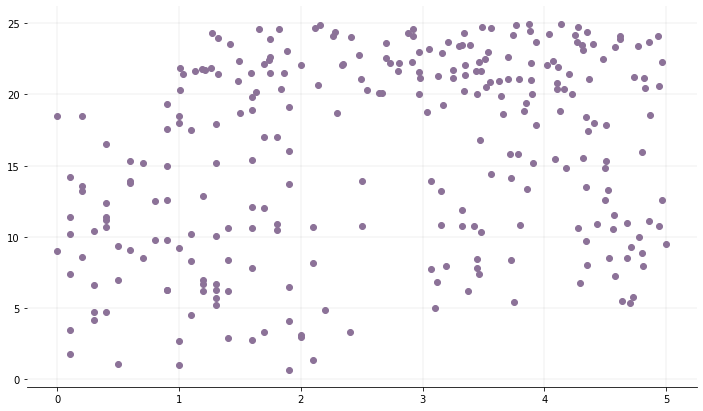

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def generate_random_dataset(size):
    """Генерация случайного набора данных, которая следует за квадратичным распределением
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # класс 0 
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # класс 1
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)        
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)    
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)    
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

# Генерация набора данных
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']
# Получение 20% от набора данных для обучения
test_size = int(np.round(size * 0.2, 0))
# Разделение набора данных на обучающие и тестовые наборы
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values
# Построение графика для обучающего набора
fig, ax = plt.subplots(figsize=(12, 7))
# Удаление верхней и правой границ
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Добавление основных линий сетки
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")
plt.show()

Квадратичная кривая может решить эту проблему. Используем машину опорных векторов с полиномиальным ядром второй степени.

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Чтобы увидеть результат, можно построить гиперплоскость и зазор вместе с набором данных.

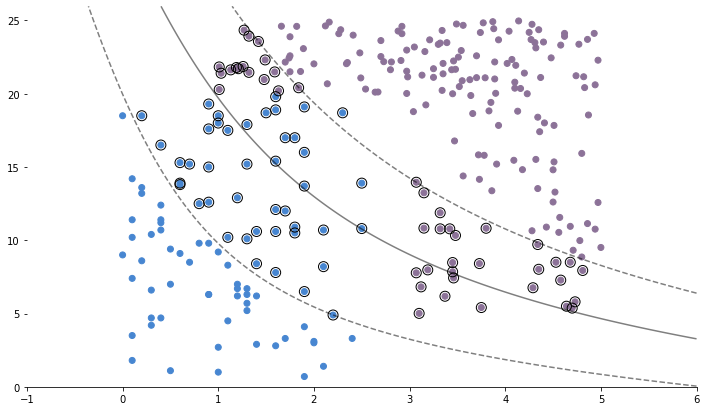

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
# Удаление верхней и правой границ
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Создание сетки для оценки модели
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Присвоение классам различных цветов
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Построение графика набора данных
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Получение разделяющей гиперплоскости
Z = model.decision_function(xy).reshape(XX.shape)
# Рисунок границ решения и запасов
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Выделение опорных векторов окружностями
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Если мы рассчитаем точность этой модели по сравнению с тестовым набором, то получим хороший результат, учитывая, что набор очень мал и генерируется случайно.

In [ ]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("2nd degree polynomial Kernel\nAccuracy (normalized): " + str(accuracy_poly))

2nd degree polynomial Kernel
Accuracy (normalized): 0.8


Точность хорошая, но может ли упрощенный подход решить проблему? Чтобы соответствовать машине опорных векторов с линейным ядром, нужно обновить параметр ядра.

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Аналогично рисуем гиперплоскость и зазор вместе с набором данных

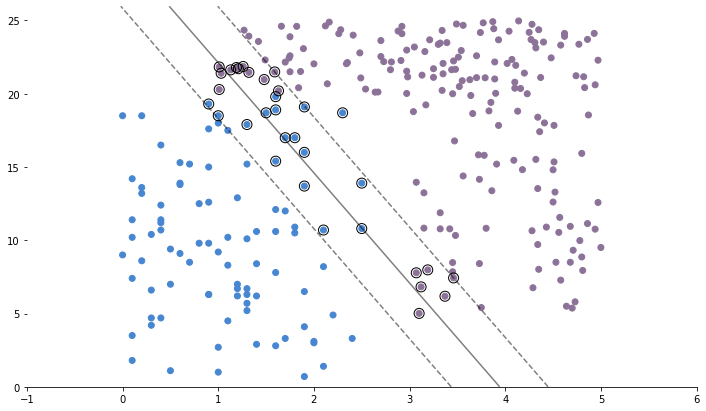

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
# Удаление верхней и правой границ
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Создание сетки для оценки модели
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Присвоение классам различных цветов
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Построение графика набора данных
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Получение разделяющей гиперплоскости
Z = model.decision_function(xy).reshape(XX.shape)
# Рисунок границ решения и запасов
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Выделение опорных векторов окружностями
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Неправильно классифицированных точек стало меньше, как и точек внутри зазора.

In [ ]:
predictions_linear = model.predict(x_test)
accuracy_linear = accuracy_score(y_test, predictions_linear)
print("Linear Kernel\nAccuracy (normalized): " + str(accuracy_linear))

Linear Kernel
Accuracy (normalized): 0.85


Точность этой модели немного лучше, чем у той, что имеет полиномиальное ядро. Как выяснилось, для этой задачи более простая модель — с линейным ядром — оказалась лучшим решением.

### Пример 4
"Non-linear SVM"

Automatically created module for IPython interactive environment


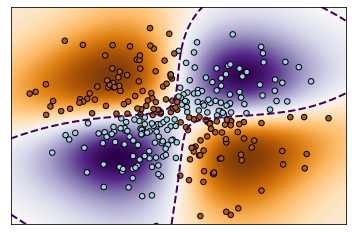

In [ ]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

# Источники информации 
1.   https://habr.com/ru/post/428503/ Краткий обзор алгоритма машинного обучения Метод Опорных Векторов (SVM)
2.   https://neerc.ifmo.ru/wiki/index.php?title=Метод_опорных_векторов_(SVM) Метод опорных векторов (SVM) - Викиконспекты
3. https://habr.com/ru/company/ods/blog/484148/ SVM. Объяснение с нуля и реализация на python. Подробный разбор метода опорных векторов
4. https://zen.yandex.ru/media/id/5e048b1b2b616900b081f1d9/vvedenie-v-metod-opornyh-vektorov-5fc7482df29188080efef35e 
Введение в метод опорных векторов
5. https://ru.wikipedia.org/wiki/Метод_опорных_векторов Метод опорных векторов
6. https://medium.com/nuances-of-programming/метод-опорных-векторов-примеры-на-python-655455a2fd3b Метод опорных векторов: примеры на Python
7. https://scikit-learn.ru/1-4-support-vector-machines/ Метод опорных векторов SVM